# Exploring temperaturate data
Let's start by having a look at some temperature data for Santa Barbara and globally. You can get so much data by visiting the NASA Goddard page: https://data.giss.nasa.gov/gistemp/ 

We are going to look at two particular temperature datasets. Go ahead and download these as csv (you can also dynamically read from these sites, but for now you should have a look at the actual data). 

1. Santa barabara weather station: [SB data](https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=USC00047902&ds=14&dt=1) 
2. Global mean computed with respect to the average from 1951-1980: [global NASA](https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv)

## Plot temperature anomaly 
Climate scientists often use $\Delta T = T_{yr} - T_{avg}$ where $T_{avg}$ is the average baseline computed from 1951-1980. Let's create a panda data frame that will read these two files in, merge them into a single data frame and plot the global temperature anomaly vs. local. 

I give you an exmaple of a temperature vs. year plot for April. Note that for the above you will want to use the metANN (annual mean absolute temperature). But this is the temperature computed per year and you will need to subtract the average


     YEAR     JAN     FEB     MAR     APR     MAY     JUN     JUL     AUG  \
0    1893  999.90   11.94   11.60   13.91   15.28   16.90   18.29   19.09   
1    1894    9.77  999.90   11.83   13.97   14.60   16.45   17.27   18.97   
2    1895   10.84   13.19   11.97   14.19   15.95   17.08   18.47   18.49   
3    1896   13.36   14.84   14.14   12.91   16.39   18.00   19.49   19.80   
4    1897   12.38   11.44  999.90   15.21   15.26   17.20  999.90  999.90   
..    ...     ...     ...     ...     ...     ...     ...     ...     ...   
128  2021   13.34   13.80   13.54   15.35   16.58   18.89   20.69   20.36   
129  2022   12.89   14.06   15.63   17.33   17.18   19.78   19.97   20.88   
130  2023   11.88   11.65   12.81   14.40   16.03   17.28   20.10   21.29   
131  2024   13.11   13.01   13.98   14.88   15.62   18.22   19.59   20.35   
132  2025   12.25   13.57  999.90  999.90  999.90  999.90  999.90  999.90   

        SEP     OCT     NOV     DEC   D-J-F   M-A-M   J-J-A   S-O-N  metANN

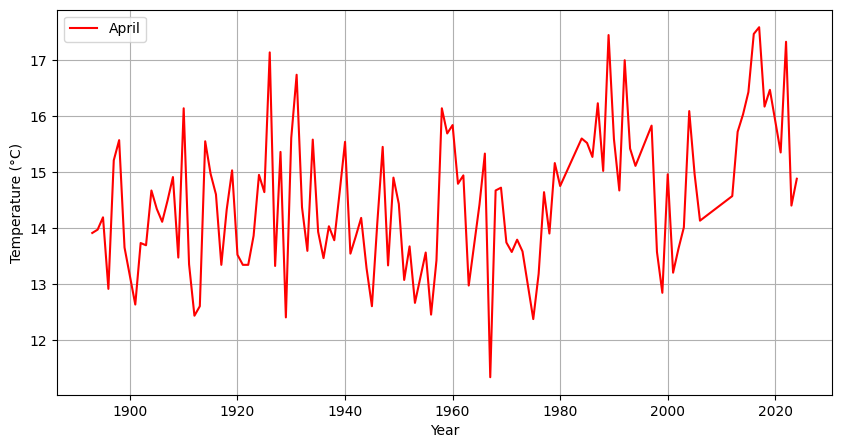

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URLs for data sources
global_temp_url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
santa_barbara_file = "SB.csv"
#https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=USC00047902&ds=14&dt=1 
# Local file placeholder for Santa Barbara data
# Load Global Temperature Anomaly Data

# Load Santa Barbara Temperature Data
santa_barbara_df = pd.read_csv(santa_barbara_file)
santa_barbara_df.columns = santa_barbara_df.columns.str.strip()  # Strip spaces from column names


print(santa_barbara_df)

if 'YEAR' in santa_barbara_df.columns and 'APR' in santa_barbara_df.columns:
    santa_barbara_df = santa_barbara_df[['YEAR', 'APR']]
    santa_barbara_df.columns = ['Year', 'APR']
    santa_barbara_df = santa_barbara_df[santa_barbara_df['APR'] != 999.9]  # Remove missing data
    santa_barbara_df['APR'] = santa_barbara_df['APR'].astype(float)
else:
    raise KeyError("Santa Barbara data does not contain expected 'YEAR' and 'metANN' columns.")

print(santa_barbara_df)
    
plt.figure(figsize=(10, 5))
plt.plot(santa_barbara_df['Year'], santa_barbara_df['APR'], label='April', color='red')

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
#plt.title('Santa Barbara vs. Global Temperature Anomalies')
plt.legend()
plt.grid()
plt.show()


   Year  Global_Temp_Anomaly  Santa_Barbara_Temp_Anomaly
0  1893                -0.32                   -0.533333
1  1894                -0.31                   -0.333333
2  1895                -0.23                    0.036667
3  1896                -0.12                    0.756667
4  1897                -0.11                    0.256667


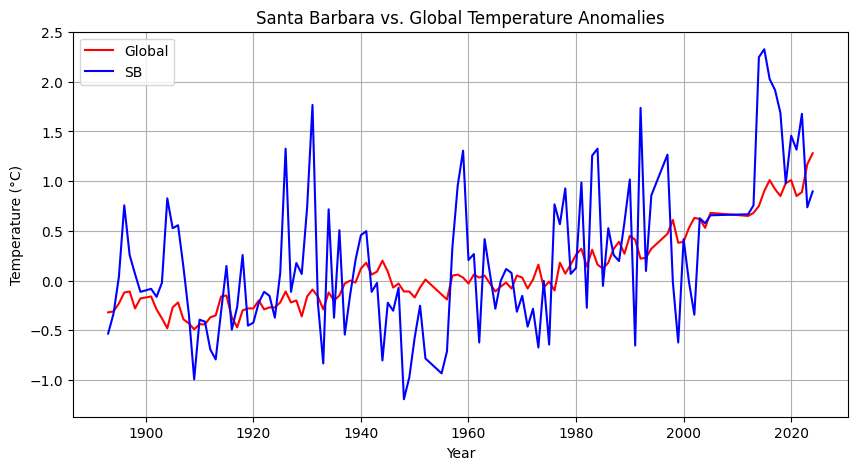

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URLs for data sources
global_temp_url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
santa_barbara_file = "SB.csv"
# Local file placeholder for Santa Barbara data
#https://data.giss.nasa.gov/cgi-bin/gistemp/stdata_show_v4.cgi?id=USC00047902&ds=14&dt=1  

# Load Global Temperature Anomaly Data
global_temp_df = pd.read_csv(global_temp_url, skiprows=1)
#print(global_temp_df) 
global_temp_df = global_temp_df[['Year', 'J-D']]
global_temp_df.columns = ['Year', 'Global_Temp_Anomaly']
global_temp_df = global_temp_df[global_temp_df['Global_Temp_Anomaly'] != '***']  # Remove invalid data
global_temp_df['Global_Temp_Anomaly'] = global_temp_df['Global_Temp_Anomaly'].astype(float)

# Load Santa Barbara Temperature Data
santa_barbara_df = pd.read_csv(santa_barbara_file)
santa_barbara_df.columns = santa_barbara_df.columns.str.strip()  # Strip spaces from column names

if 'YEAR' in santa_barbara_df.columns and 'metANN' in santa_barbara_df.columns:
    santa_barbara_df = santa_barbara_df[['YEAR', 'metANN']]
    santa_barbara_df.columns = ['Year', 'Santa_Barbara_Temp_Absolute']
    santa_barbara_df = santa_barbara_df[santa_barbara_df['Santa_Barbara_Temp_Absolute'] != 999.9]  # Remove missing data
    santa_barbara_df['Santa_Barbara_Temp_Absolute'] = santa_barbara_df['Santa_Barbara_Temp_Absolute'].astype(float)
else:
    raise KeyError("Santa Barbara data does not contain expected 'YEAR' and 'metANN' columns.")

# Compute Santa Barbara Temperature Anomaly (Baseline: 1951-1980 mean)
baseline_sb = santa_barbara_df[(santa_barbara_df['Year'] >= 1951) & (santa_barbara_df['Year'] <= 1980)]['Santa_Barbara_Temp_Absolute'].mean()
santa_barbara_df['Santa_Barbara_Temp_Anomaly'] = santa_barbara_df['Santa_Barbara_Temp_Absolute'] - baseline_sb

# Merge the datasets
merged_df = pd.merge(global_temp_df, santa_barbara_df[['Year', 'Santa_Barbara_Temp_Anomaly']], on='Year', how='inner')

print(merged_df.head())
plt.figure(figsize=(10, 5))
plt.plot(merged_df["Year"], merged_df["Global_Temp_Anomaly"], label="Global", color='red')
plt.plot(merged_df["Year"], merged_df["Santa_Barbara_Temp_Anomaly"],label="SB", color='blue')

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Santa Barbara vs. Global Temperature Anomalies')
plt.legend()
plt.grid()
plt.show()

# Temperature vs. CO2 
CO2 is a greenhouse gas that absorbs infrared radiation. This leads to an insulating effect, like wrapping the earth in a blanket. The underlying mechanism responsible for CO2 absorbing radiation is well understood, and even in the 1900's chemistry giant Arrhenius [computed](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/98EO00206) the effect of CO2 on the earth's average temperature. 

The NOAA keeps track of greenhouse gasses like CO2, which you can find on the [Global Monitoring Network](https://gml.noaa.gov/ccgg/data/) 

Let's do the following analysis. 
1. Create a merged panda dataset of the CO2 and average temperature anomaly 
2. Plot the average temperature 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# URLs for data sources
co2_url = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv"
temp_url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"

#https://data.giss.nasa.gov/gistemp/ 
#Global-mean monthly, seasonal, and annual means, 1880-present, updated through most recent month: TXT, CSV

# Load CO2 data
co2_df = pd.read_csv(co2_url, comment='#', header=0, skiprows=1)
co2_df.columns = ["Year", "mean","unc"]
co2_df = co2_df[['Year', 'mean','unc']]

# Load Temperature anomaly data
skip_rows = 1  # Skip metadata at the top of the NASA file
temp_df = pd.read_csv(temp_url, skiprows=skip_rows)
temp_df = temp_df[['Year', 'J-D']]
temp_df.columns = ['Year', 'Temperature_Anomaly']
temp_df = temp_df[temp_df['Temperature_Anomaly'] != '***']  # Remove invalid data

temp_df['Temperature_Anomaly'] = temp_df['Temperature_Anomaly'].astype(float)

# Merge the two datasets
merged_df = pd.merge(co2_df, temp_df, on='Year', how='inner')


## Correlation 
Let's use our data frame to plot the temperature anomaly vs. CO2 concentration. Are they correlated? We can test how correlated they are using the pearsonr test from [scipy, pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html). 

A statistical note. A linear correlation does not necessarily imply the underlying cause. However, in this case our hypothesis was that increasing CO2 should create an average warming effect.

In [5]:
print(merged_df)

    Year    mean   unc  Temperature_Anomaly
0   1959  315.98  0.12                 0.03
1   1960  316.91  0.12                -0.03
2   1961  317.64  0.12                 0.06
3   1962  318.45  0.12                 0.03
4   1963  318.99  0.12                 0.05
..   ...     ...   ...                  ...
61  2020  414.21  0.12                 1.01
62  2021  416.41  0.12                 0.85
63  2022  418.53  0.12                 0.89
64  2023  421.08  0.12                 1.17
65  2024  424.61  0.12                 1.28

[66 rows x 4 columns]


## A simple model 
A simple model is that the temperature change depends on the log of the CO2, or 
$\Delta T = \lambda \cdot ln(\frac{CO_{2}}{C_{0}})$. 

Fit the data to this function. You can do it by either linearizing the data or by using a non-linear fit. 